In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

In [2]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 soft voting 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [4]:
# VotingClassifier 학습/예측/평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561


In [5]:
# 개별 모델의 학습/예측/평가

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


## Breast Cancer

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost.plotting import plot_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

In [8]:
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
# check dataset
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [10]:
# cancer_df에서 feature용 Dataframe과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label, Feature용 Dataframe은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출

x_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [11]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 분류
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 x_train, y_train을 다시 쪼개서 90%는 학습, 10%는 검증용 데이터로 분류
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=156)

print(x_train.shape, x_test.shape)
print(x_tr.shape, x_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [12]:
# 학습, 검증, 테스트용 DMatrix 생성

dtr = xgb.DMatrix(data=x_tr, label=y_tr)

In [13]:
dval = xgb.DMatrix(data=x_val, label=y_val)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [14]:
# max_depth  = 3
# 학습률 eta는 0,1
# 예제 데이터가 0 또는 1의 이진 분류이므로 목적함수는 binary logistic
# 오류 함수의 펴 ㅇ가 성능 지표는 logloss
# num_rounds는 400회

params = {'max_depth':3,
            'eta':0.05,
            'objective':'binary:logistic',
            'eval_metric':'logloss'}

num_rounds = 400

In [15]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 표기
eval_list = [(dtr, 'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [16]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과를 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10]))

# 에측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict( ) 수행 결과를 10개만 표시, 예측 확률 값으로 표시됨
[1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# 정밀도와 재현율
def get_clf_eval(actual, pred=None, pred_proba=None):
    con = confusion_matrix(actual, pred)
    acc = accuracy_score(actual, pred)
    pre = precision_score(actual, pred)
    rec = recall_score(actual, pred)
    f1 = f1_score(actual, pred)
    roc_auc = roc_auc_score(actual, pred_proba)
    
    print('오차 행렬\n', con)
    print(f'정확도;{acc:6.4f} 정밀도:{pre:6.4f} 재현율:{rec:6.4f} F1:{f1:6.4f}')
    print(f'ROC AUC:{roc_auc:6.4f}')

In [18]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
 [[34  3]
 [ 2 75]]
정확도;0.9561 정밀도:0.9615 재현율:0.9740 F1:0.9677
ROC AUC:0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

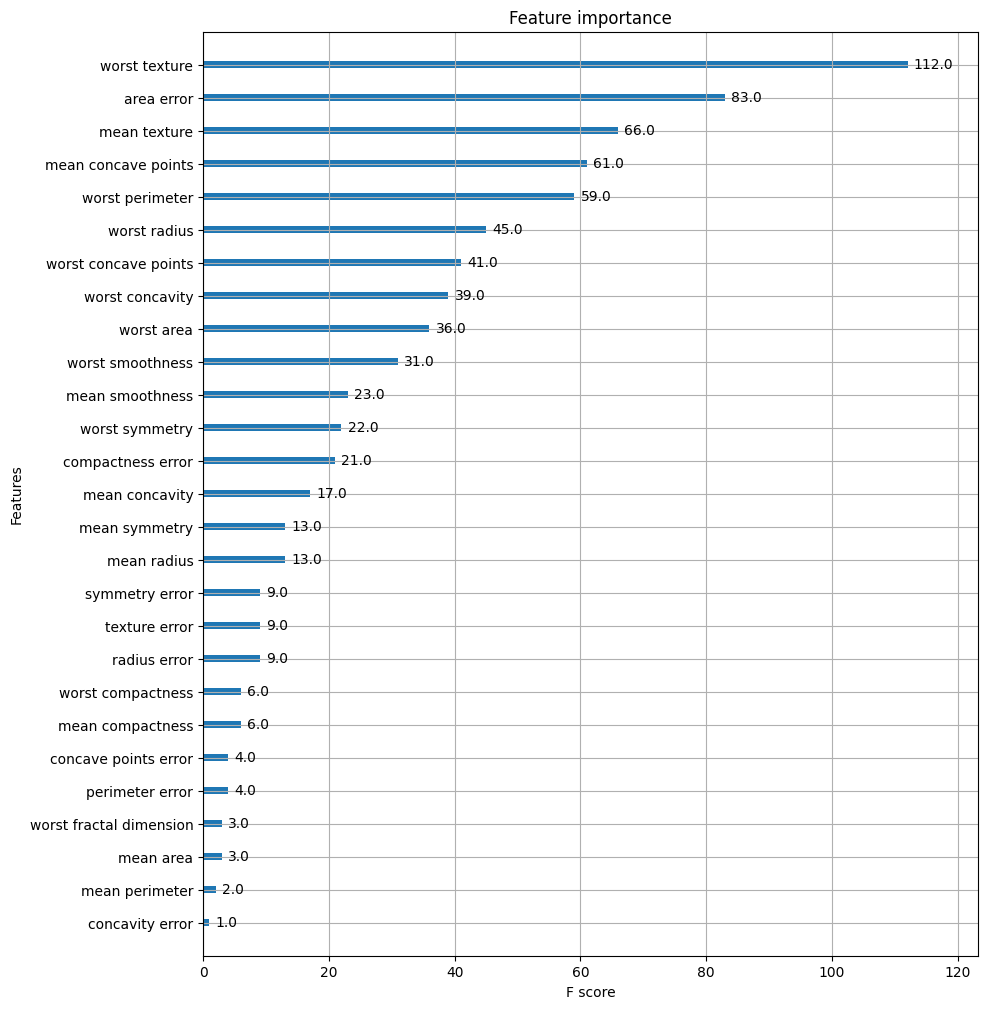

In [19]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [20]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(x_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

In [21]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
 [[34  3]
 [ 1 76]]
정확도;0.9649 정밀도:0.9620 재현율:0.9870 F1:0.9744
ROC AUC:0.9954


In [22]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(x_tr, y_tr), (x_val, y_val)]
xgb_wrapper.fit(x_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(x_test)
ws50_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[91]	validation_0-logloss:0.03202	validation_1-logloss:0.25886
[92]	validation_0-logloss:0.03152	validation_1-logloss:0.25918
[93]	validation_0-logloss:0.03107	validation_1-logloss:0.25864
[94]	validation_0-logloss:0.03049	validation_1-logloss:0.25951
[95]	validation_0-logloss:0.03007	validation_1-logloss:0.26091
[96]	validation_0-logloss:0.02963	validation_1-logloss:0.26014
[97]	validation_0-logloss:0.02913	validation_1-logloss:0.25974
[98]	validation_0-logloss:0.02866	validation_1-logloss:0.25937
[99]	validation_0-logloss:0.02829	validation_1-logloss:0.25893
[100]	validation_0-logloss:0.02789	validation_1-logloss:0.25928
[101]	validation_0-logloss:0.02751	validation_1-logloss:0.25955
[102]	validation_0-logloss:0.02714	validation_1-logloss:0.25901
[103]	validation_0-logloss:0.02668	validation_1-logloss:0.25991
[104]	validation_0-logloss:0.02634	validation_1-logloss:0.25950
[105]	validation_0-logloss:0.02594	validation_1-logloss:0.25924
[106]	validation_0-logloss:0.02556	validation_1-l

In [23]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
 [[34  3]
 [ 2 75]]
정확도;0.9561 정밀도:0.9615 재현율:0.9740 F1:0.9677
ROC AUC:0.9933


In [24]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(x_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(x_test)
ws10_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-logloss:0.04580	validation_1-logloss:0.26204
[73]	validation_0-logloss:0.04484	validation_1-logloss:0.26254
[74]	validation_0-logloss:0.04388	validation_1-logloss:0.26289
[75]	validation_0-logloss:0.04309	validation_1-logloss:0.26249
[76]	validation_0-logloss:0.04224	validation_1-logloss:0.26217
[77]	validation_0-logloss:0.04133	validation_1-logloss:0.26166
[78]	validation_0-logloss:0.04050	validation_1-logloss:0.26179
[79]	validation_0-logloss:0.03967	validation_1-logloss:0.26103
[80]	validation_0-logloss:0.03876	validation_1-logloss:0.26094
[81]	validation_0-logloss:0.03806	validation_1-logloss:0.26148
[82]	validation_0-logloss:0.03740	validation_1-logloss:0.26054
[83]	validation_0-logloss:0.03676	validation_1-logloss:0.25967
[84]	validation_0-logloss:0.03605	validation_1-logloss:0.25905
[85]	validation_0-logloss:0.03545	validation_1-logloss:0.26007
[86]	validation_0-logloss:0.03489	validation_1-logloss:0.25984
[87]	validation_0-logloss:0.03425	validation_1-logloss:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

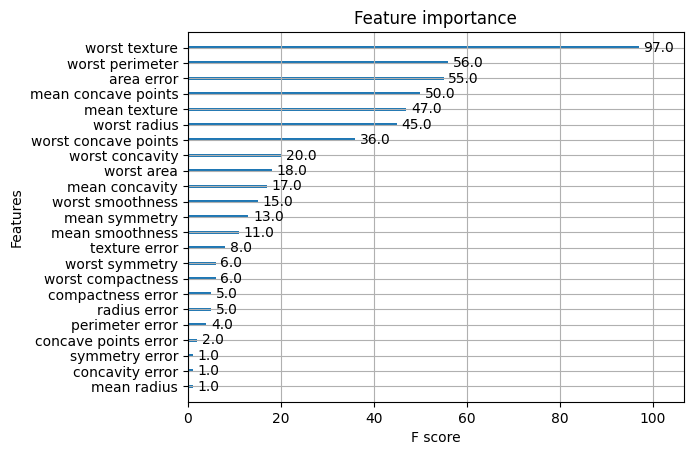

In [25]:
fig, ax = plt.subplots()
plot_importance(xgb_wrapper, ax=ax)